# Day 8 : Data Loading and Manipulation and Visulatiozation (Facies)

### You can use the following liberaries for your assignment:
> Numpy, Pandas, Matplotlib, Seaborn, LASIO, Welly

## Kindly load the las file of well1513.csv file from the data folder
## Perform the below Tasks:

>1. Investigate the component of the data file (number of columns , numbers of observations, Null values, normal statistics) 
2. Plot well logs together with Facies column (FORCE_2020_LITHOFACIES_LITHOLOGY) as striplog (facies log)
3. How many classes in the facies log.
4. How many data points per each class.



In [1]:
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sb
import lasio
df=pd.read_csv(r'C:/Users/GoSmart/Documents/GitHub/GeoML-2.0/10DaysChallenge/Dutch_F3_Logs/well1513.csv',delimiter=',')

In [2]:
display('Name of columns',df.columns)
display(df.info())

'Name of columns'

Index(['Unnamed: 0', 'WELL', 'DEPTH_MD', 'X_LOC', 'Y_LOC', 'Z_LOC', 'GROUP',
       'FORMATION', 'CALI', 'RSHA', 'RMED', 'RDEP', 'RHOB', 'GR', 'SGR',
       'NPHI', 'PEF', 'DTC', 'SP', 'BS', 'ROP', 'DTS', 'DCAL', 'DRHO',
       'MUDWEIGHT', 'RMIC', 'ROPA', 'RXO', 'FORCE_2020_LITHOFACIES_LITHOLOGY',
       'FORCE_2020_LITHOFACIES_CONFIDENCE'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18270 entries, 0 to 18269
Data columns (total 30 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         18270 non-null  int64  
 1   WELL                               18270 non-null  object 
 2   DEPTH_MD                           18270 non-null  float64
 3   X_LOC                              18270 non-null  float64
 4   Y_LOC                              18270 non-null  float64
 5   Z_LOC                              18270 non-null  float64
 6   GROUP                              18270 non-null  object 
 7   FORMATION                          15806 non-null  object 
 8   CALI                               18270 non-null  float64
 9   RSHA                               1623 non-null   float64
 10  RMED                               18270 non-null  float64
 11  RDEP                               18270 non-null  flo

None

In [3]:
print ('the Number of NAN value')
df.isnull().sum()

the Number of NAN value


Unnamed: 0                               0
WELL                                     0
DEPTH_MD                                 0
X_LOC                                    0
Y_LOC                                    0
Z_LOC                                    0
GROUP                                    0
FORMATION                             2464
CALI                                     0
RSHA                                 16647
RMED                                     0
RDEP                                     0
RHOB                                     0
GR                                       0
SGR                                  18270
NPHI                                  4238
PEF                                   1830
DTC                                     81
SP                                       0
BS                                   18270
ROP                                    109
DTS                                  18270
DCAL                                 18270
DRHO       

In [4]:
df.describe()

,Unnamed: 0,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,CALI,RSHA,RMED,RDEP,RHOB,...,ROP,DTS,DCAL,DRHO,MUDWEIGHT,RMIC,ROPA,RXO,FORCE_2020_LITHOFACIES_LITHOLOGY,FORCE_2020_LITHOFACIES_CONFIDENCE
count,18270.000000,18270.000000,18270.000000,1.827000e+04,18270.000000,18270.000000,1623.000000,18270.000000,18270.000000,18270.000000,...,18161.000000,0.0,0.0,18270.000000,17464.000000,0.0,0.0,1627.000000,18270.000000,18270.000000
mean,9134.500000,1883.228478,437627.322429,6.470979e+06,-1857.985240,14.789688,2.901504,1.835372,1.832040,2.110451,...,27.115614,NaN,NaN,0.012675,0.139777,NaN,NaN,5.748493,60476.696223,1.039080
std,5274.239045,801.941195,14.359784,3.508944e+00,801.742890,4.377047,3.474120,2.891524,2.197939,0.297725,...,30.452190,NaN,NaN,0.047393,0.009454,NaN,NaN,71.588789,13972.748152,0.276835
min,0.000000,494.528000,437593.343750,6.470972e+06,-3246.156250,8.186605,0.175400,0.374989,0.352202,1.404576,...,0.138586,NaN,NaN,-0.679026,0.129413,NaN,NaN,0.171424,30000.000000,1.000000
25%,4567.250000,1188.750000,437614.812500,6.470976e+06,-2552.392883,12.125232,0.934778,0.782044,0.799976,1.963399,...,4.727499,NaN,NaN,-0.007219,0.133007,NaN,NaN,0.934500,65000.000000,1.000000
50%,9134.500000,1882.972000,437631.187500,6.470978e+06,-1857.799133,13.913155,1.473143,1.211789,1.293638,2.055079,...,30.297560,NaN,NaN,0.001565,0.136602,NaN,NaN,1.455721,65000.000000,1.000000
75%,13701.750000,2577.802000,437640.781250,6.470982e+06,-1163.699371,18.309367,3.352066,2.067438,2.085021,2.381963,...,39.995598,NaN,NaN,0.020022,0.144990,NaN,NaN,3.464941,65000.000000,1.000000
max,18269.000000,3272.024000,437642.812500,6.470984e+06,-469.501831,23.329569,54.536583,142.606338,49.221905,2.927888,...,1083.425415,NaN,NaN,0.210927,0.156973,NaN,NaN,2000.000000,99000.000000,3.000000


In [5]:
df.keys()

Index(['Unnamed: 0', 'WELL', 'DEPTH_MD', 'X_LOC', 'Y_LOC', 'Z_LOC', 'GROUP',
       'FORMATION', 'CALI', 'RSHA', 'RMED', 'RDEP', 'RHOB', 'GR', 'SGR',
       'NPHI', 'PEF', 'DTC', 'SP', 'BS', 'ROP', 'DTS', 'DCAL', 'DRHO',
       'MUDWEIGHT', 'RMIC', 'ROPA', 'RXO', 'FORCE_2020_LITHOFACIES_LITHOLOGY',
       'FORCE_2020_LITHOFACIES_CONFIDENCE'],
      dtype='object')

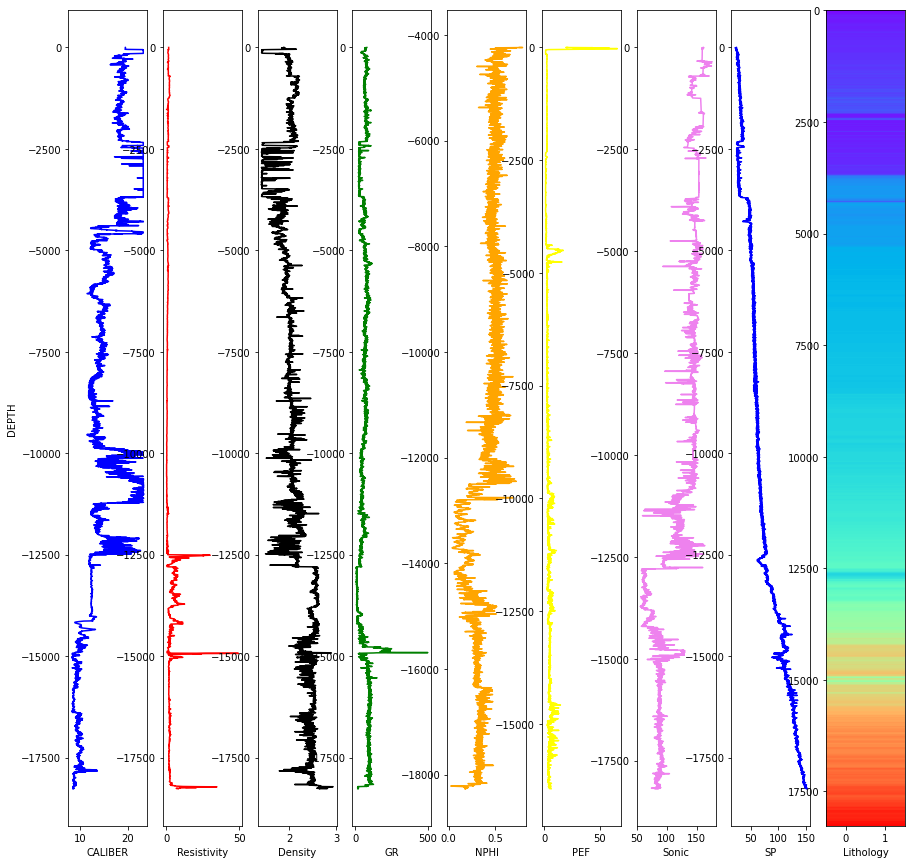

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,15))
plt.subplot(1, 9, 1)
plt.plot(df.CALI, -1*df.index, label = 'CALI', c = 'b')
plt.xlabel('CALIBER')
plt.ylabel('DEPTH')

plt.subplot(1, 9, 2)
plt.plot(df.RDEP, -1*df.index, label = 'RDEP', c = 'r')
plt.xlabel('Resistivity')
plt.subplot(1, 9, 3)
plt.plot(df.RHOB, -1*df.index, label = 'RHOB', c = 'black')
plt.xlabel('Density')
plt.subplot(1, 9, 4)
plt.plot(df.GR, -1*df.index, label = 'GR', c = 'g')
plt.xlabel('GR')
plt.subplot(1, 9, 5)
plt.plot(df.NPHI, -1*df.index, label = 'NPHI', c = 'orange')
plt.xlabel('NPHI')
plt.subplot(1, 9, 6)
plt.plot(df.PEF, -1*df.index, label = 'PEF', c = 'yellow')
plt.xlabel('PEF')
plt.subplot(1, 9, 7)
plt.plot(df.DTC, -1*df.index, label = 'DTC', c = 'violet')
plt.xlabel('Sonic')
plt.subplot(1, 9, 8)
plt.plot(df.SP, -1*df.index, label = 'SP', c = 'b')
plt.xlabel('SP')
plt.subplot(1, 9, 9)
F = np.vstack((df.iloc[:,18],df.iloc[:,18])).T
plt.imshow(F, aspect='auto', cmap = 'rainbow')
plt.xlabel('Lithology');

In [10]:
display('Number of Facies classes:',df["FORCE_2020_LITHOFACIES_LITHOLOGY"].nunique())

display('Number of data points per each Facies class:', df.value_counts("FORCE_2020_LITHOFACIES_LITHOLOGY"))

'Number of Facies classes:'

8

'Number of data points per each Facies class:'

FORCE_2020_LITHOFACIES_LITHOLOGY
65000    12547
30000     2937
70000     1418
65030      708
80000      429
99000      173
74000       41
86000       17
dtype: int64